<a href="https://colab.research.google.com/github/danyelliot/NIDS-ML-PROYECTO/blob/main/Copia_de_Detecci%C3%B3n_de_Intrusiones_en_Redes_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando modulos

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Descargando y descomprimiendo dataset

In [2]:
!gdown 1RnXvhMNxk7ZNO3A8PB4zIuhiTpTAkuPu

Downloading...
From (original): https://drive.google.com/uc?id=1RnXvhMNxk7ZNO3A8PB4zIuhiTpTAkuPu
From (redirected): https://drive.google.com/uc?id=1RnXvhMNxk7ZNO3A8PB4zIuhiTpTAkuPu&confirm=t&uuid=fa0a9cb4-34f3-4477-b2f4-a281d5f174ee
To: /content/NF-UQ-NIDS-v2.csv.zip
100% 2.19G/2.19G [00:25<00:00, 87.1MB/s]


In [3]:
!unzip NF-UQ-NIDS-v2.csv.zip

Archive:  NF-UQ-NIDS-v2.csv.zip
  inflating: NF-UQ-NIDS-v2.csv       


In [4]:
#@title # **Cargar el dataset** {run:"auto"}
#@markdown Cargaremos una parte del dataset pues la cantidad de filas es del orden de millones y queremos ahorrar tiempo y poder computacional
chunksize = 2000000 #@param {type:"slider", min:0, max:11000000, step:1000000}
df = pd.read_csv('NF-UQ-NIDS-v2.csv',chunksize=chunksize)
division_factor = 1 #@param {type:"slider", min:1, max:10, step:1}
data_size = int(chunksize/division_factor)
print(f"Number of rows extracted: {int(data_size)}")
df = df.get_chunk(data_size)
df.head(10)

Number of rows extracted: 2000000


,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,...,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack,Dataset
0,192.168.100.148,65389,192.168.100.7,80,6,7.0,420,3,0,0,...,0,35840,140,0,0,0,0.0,1,DoS,NF-BoT-IoT-v2
1,192.168.100.148,11154,192.168.100.5,80,6,7.0,280,2,40,1,...,0,0,0,0,0,0,0.0,1,DoS,NF-BoT-IoT-v2
2,192.168.1.31,42062,192.168.1.79,1041,6,0.0,44,1,40,1,...,0,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2
3,192.168.1.34,46849,192.168.1.79,9110,6,0.0,44,1,40,1,...,0,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2
4,192.168.1.30,50360,192.168.1.152,1084,6,0.0,44,1,40,1,...,0,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2
5,172.31.66.53,51860,77.93.254.178,443,6,91.0,152,3,120,3,...,0,0,0,0,0,0,0.0,0,Benign,NF-CSE-CIC-IDS2018-v2
6,192.168.1.32,56402,192.168.1.169,9012,6,0.0,232,4,132,3,...,65535,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2
7,192.168.1.31,54001,192.168.1.180,22,6,92.0,84,2,88,2,...,29200,0,0,0,0,0,0.0,1,scanning,NF-ToN-IoT-v2
8,192.168.100.147,33372,192.168.100.5,80,6,7.0,280,2,40,1,...,0,35840,140,0,0,0,0.0,1,DoS,NF-BoT-IoT-v2
9,192.168.1.31,37085,192.168.1.193,1863,6,0.0,44,1,40,1,...,0,0,0,0,0,0,0.0,1,scanning,NF-ToN-IoT-v2


In [5]:
#@title ## **Numero de columnas**
df.columns.shape

(46,)

In [6]:
#@title ## **Tipos de valores de las columnas**
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 46 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   IPV4_SRC_ADDR                object 
 1   L4_SRC_PORT                  int64  
 2   IPV4_DST_ADDR                object 
 3   L4_DST_PORT                  int64  
 4   PROTOCOL                     int64  
 5   L7_PROTO                     float64
 6   IN_BYTES                     int64  
 7   IN_PKTS                      int64  
 8   OUT_BYTES                    int64  
 9   OUT_PKTS                     int64  
 10  TCP_FLAGS                    int64  
 11  CLIENT_TCP_FLAGS             int64  
 12  SERVER_TCP_FLAGS             int64  
 13  FLOW_DURATION_MILLISECONDS   int64  
 14  DURATION_IN                  int64  
 15  DURATION_OUT                 int64  
 16  MIN_TTL                      int64  
 17  MAX_TTL                      int64  
 18  LONGEST_FLOW_PKT             int64  
 19  

In [7]:
#@title ## **Nombre de columnas**
df.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS',
       'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 'MIN_TTL',
       'MAX_TTL', 'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN',
       'MAX_IP_PKT_LEN', 'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES',
       'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS',
       'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
       'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
       'ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE',
       'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE', 'Label', 'Attack', 'Dataset'],
      dtype='ob

In [8]:
#@title # **Label encode de las IPv4 de salida y destino**
LE = LabelEncoder()
srcaddr= LE.fit_transform(df['IPV4_SRC_ADDR'])
df['IPV4_SRC_ADDR'] = pd.Series(srcaddr)
dstaddr= LE.fit_transform(df['IPV4_DST_ADDR'])
df['IPV4_DST_ADDR'] = pd.Series(dstaddr)

In [9]:
#@title # **Entendiendo las labels** {run:"auto"}
#@markdown ### Para los distintos ataques se asigna 1, mientras que si es benigno se asigna 0
#@markdown ## Indice
index = 249000 #@param {type:"slider", min:0, max:1000000, step:1000}
#@markdown ## Rango de filas a mostrar
view_range = 20 #@param {type:"slider", min:0, max:100, step:10}
print("Tipos de ataque\n",df['Attack'].value_counts())
df[["Attack", "Label"]][index:index+view_range]

Tipos de ataque
 Attack
Benign            661913
DDoS              572211
DoS               470845
scanning          100396
Reconnaissance     68822
xss                64571
password           30046
injection          18143
Bot                 3806
Brute Force         3371
Infilteration       3096
Exploits             827
Fuzzers              594
Backdoor             480
Generic              449
mitm                 189
ransomware            86
Analysis              63
Theft                 54
Shellcode             33
Worms                  5
Name: count, dtype: int64


,Attack,Label
249000,Benign,0
249001,DDoS,1
249002,Benign,0
249003,Benign,0
249004,injection,1
249005,DDoS,1
249006,DoS,1
249007,Benign,0
249008,DDoS,1
249009,Benign,0


In [10]:
#@title # **Separar el dataset entre features y las labels que queremos predecir**
X = df.drop(['Attack','Label','Dataset'], axis=1)
Y = df["Label"]

In [11]:
#@title ## **Analisis de datos faltantes**
df.isnull().sum()

,0
IPV4_SRC_ADDR,0
L4_SRC_PORT,0
IPV4_DST_ADDR,0
L4_DST_PORT,0
PROTOCOL,0
L7_PROTO,0
IN_BYTES,0
IN_PKTS,0
OUT_BYTES,0
OUT_PKTS,0


In [12]:
#@title # **Transformar y rellenar datos**
#@markdown Aquí es donde rellenamos los datos faltantes con la media de los valores de cada columna, y de haber variables categóricas faltantes
#@markdown se rellenan con 'unknown' para no perder información.

# Crear una instancia de SimpleImputer para imputar valores faltantes con la media
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Seleccionar las columnas de tipo objeto (categóricas) de X
X_object = X.select_dtypes("object")
# Seleccionar las columnas de tipo entero/flotante (numéricas) de X, excluyendo las categóricas
X_int = X.select_dtypes(exclude="object")

# Guardar los nombres de las columnas numéricas
X_columns = X_int.columns

# Ajustar el imputer a las columnas numéricas y transformarlas
imputer.fit(X_int)
X_int = imputer.transform(X_int)
# Convertir el resultado de nuevo a un DataFrame y restaurar los nombres de las columnas
X_int = pd.DataFrame(X_int)
X_int.columns = X_columns

# Rellenar valores faltantes en las columnas categóricas con "unknown"
X_object = X_object.fillna("unknown")

# Unir las columnas categóricas y numéricas transformadas de nuevo en un solo DataFrame
X = X_object.join(X_int)

In [13]:
#@title # **Descripción Estadística de los Datos**
X.describe()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,...,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,...,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,1.448079e+04,4.039269e+04,2.634063e+03,3.358758e+03,1.023942e+01,5.327920e+01,1.039539e+03,9.633736e+00,2.958240e+03,4.590988e+00,...,3.532250e-01,1.921458e+00,6.029143e+03,8.370340e+03,3.747088e+03,1.463705e+01,4.508562e+03,1.407257e+00,1.598683e+04,1.504637e+00
std,3.860883e+03,1.842137e+04,8.080084e+02,1.070283e+04,5.664118e+00,7.887237e+01,9.600315e+04,5.809357e+02,2.363323e+05,1.768191e+02,...,4.467244e+01,1.597674e+02,1.325611e+04,1.768135e+04,1.152440e+04,4.501715e+01,1.329728e+04,2.521646e+01,8.035073e+06,2.022330e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.528700e+04,2.724600e+04,2.484000e+03,8.000000e+01,6.000000e+00,0.000000e+00,5.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.530100e+04,4.574200e+04,2.741000e+03,8.000000e+01,6.000000e+00,7.000000e+00,1.120000e+02,2.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,5.120000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.530300e+04,5.504400e+04,2.743000e+03,4.430000e+02,1.700000e+01,9.129000e+01,2.800000e+02,3.000000e+00,1.510000e+02,1.000000e+00,...,0.000000e+00,0.000000e+00,4.096000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.857500e+04,6.553500e+04,9.827000e+03,6.553500e+04,2.550000e+02,2.480000e+02,7.405536e+07,1.926100e+05,1.295737e+08,8.717900e+04,...,3.615200e+04,8.609600e+04,6.553500e+04,6.553500e+04,6.528000e+04,2.550000e+02,6.553500e+04,3.276900e+04,4.294916e+09,5.530000e+02


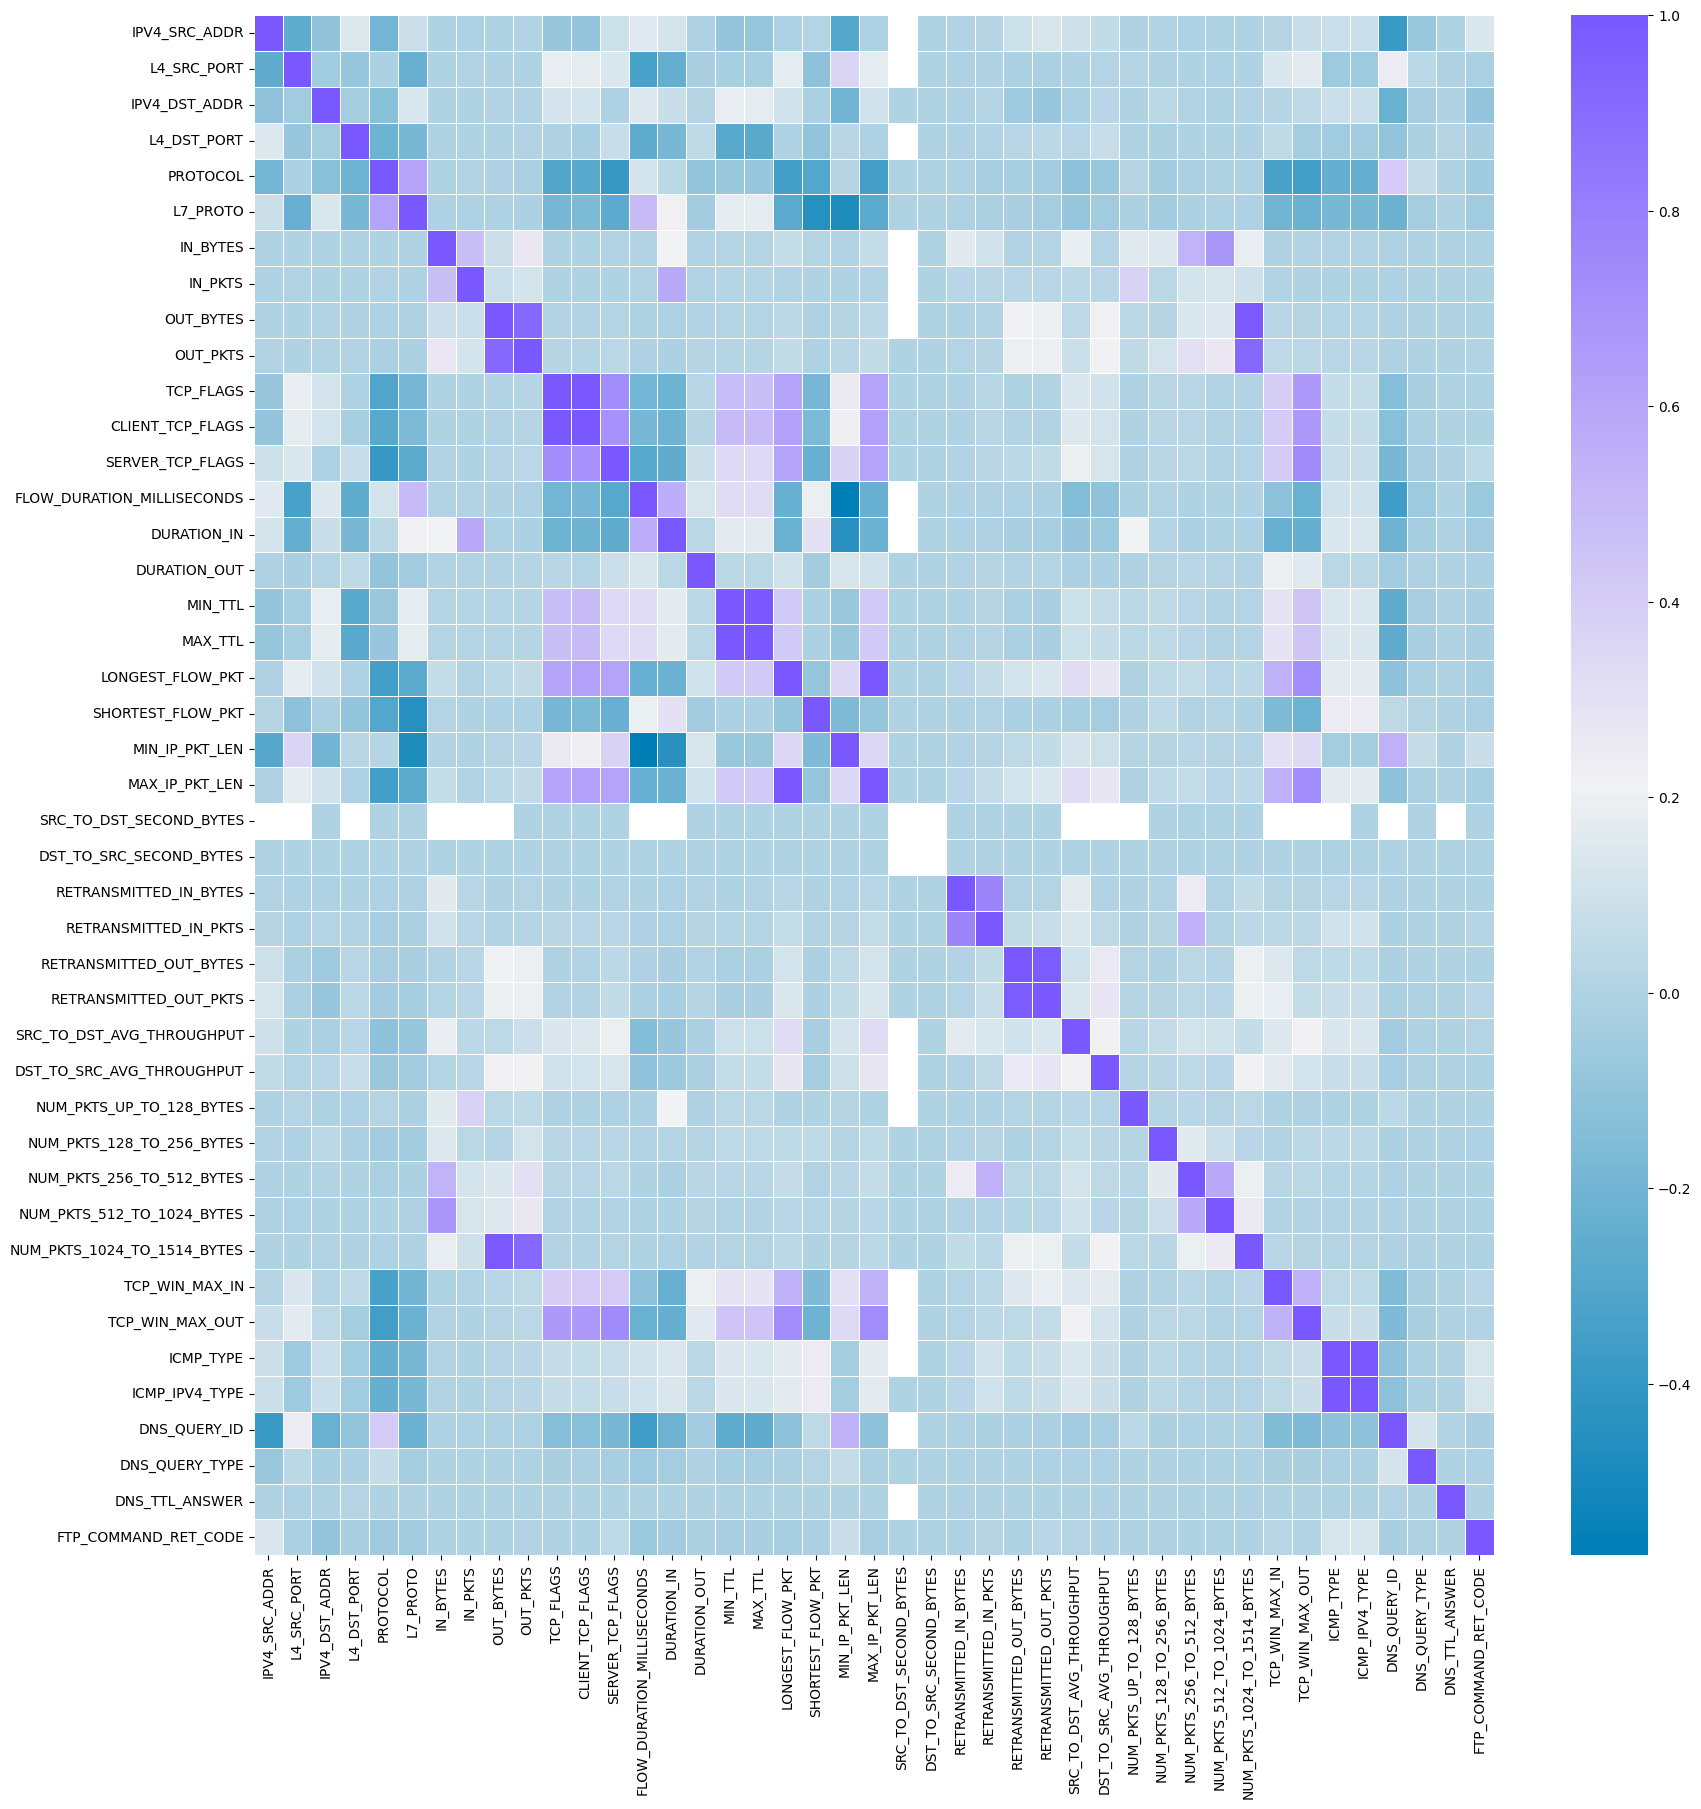

In [14]:
#@title # **Mapa de Calor de la Matriz de Correlación**
#@markdown ##Un valor de correlación de 1 (morado) indica una correlación positiva perfecta.
#@markdown ##Un valor de correlación de -1 (azul) indica una correlación negativa perfecta.
#@markdown ##Un valor de correlación de 0 (blanco) indica que no hay correlación entre las variables.

# Configurar el tamaño de la figura para el mapa de calor
plt.figure(figsize=(20, 20))

# Crear una paleta de colores divergente para el mapa de calor
cmap = sns.diverging_palette(240, 270, s=100, l=50, as_cmap=True)

# Calcular la matriz de correlación de X y generar el mapa de calor
# linewidths=0.5 especifica el ancho de las líneas que separan las celdas
attrb_reln = sns.heatmap(X.corr(), linewidths=0.5, cmap=cmap)

# Mostrar el mapa de calor
plt.show()

In [15]:
#@title # **Cálculo de Correlación Absoluta con el Objetivo**
#@markdown ##Se calcula la correlación absoluta entre cada característica en X y la variable objetivo Y.
#@markdown ##Luego se convierte el resultado en un DataFrame para facilitar su análisis y manipulación.

# Calcular la correlación absoluta de cada característica con el objetivo
corr_with_target = X.corrwith(Y).apply(abs)
# Convertir la serie de correlación a un DataFrame
df_corr_w_tgt = pd.DataFrame(corr_with_target)

# Mostrar el DataFrame de correlación
df_corr_w_tgt

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


,0
IPV4_SRC_ADDR,0.216625
L4_SRC_PORT,0.299576
IPV4_DST_ADDR,0.173830
L4_DST_PORT,0.105995
PROTOCOL,0.049893
L7_PROTO,0.382214
IN_BYTES,0.003999
IN_PKTS,0.000128
OUT_BYTES,0.016046
OUT_PKTS,0.026979


# PCA
Análisis de componentes principales

In [16]:
#@title ## **Normalizar las features**
scaler = MinMaxScaler()
cols = df.columns
X_normalized = scaler.fit_transform(X)

In [17]:
#@title ## **Matriz de covarianza**
cov_matrix = np.cov(X_normalized, rowvar=False)

In [18]:
#@title ## **Cálculo de autovalores y autovectores**
#@markdown ### Luego de realizar el cálculo ordenaremos los resultados de mayor a menor
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

print("--------------------------------------------------------------")
print(f"Indice de autovalores de mayor a menor: {sorted_index}\n")
print("--------------------------------------------------------------")
print(f"Autovalores ordenados: \n{sorted_eigenvalues}\n")
print("--------------------------------------------------------------")
print(f"Autovectores ordenados: \n{sorted_eigenvectors}")
print("--------------------------------------------------------------")

--------------------------------------------------------------
Indice de autovalores de mayor a menor: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]

--------------------------------------------------------------
Autovalores ordenados: 
[3.31236001e-01 2.01130730e-01 8.31910823e-02 7.07417500e-02
 4.75026559e-02 4.22362237e-02 3.45002970e-02 2.32037156e-02
 2.10057461e-02 1.73478486e-02 1.18905952e-02 5.72990889e-03
 2.32233029e-03 1.26802083e-03 7.91916069e-04 3.76047685e-04
 2.24113125e-04 1.78323526e-04 1.00057919e-04 7.40228407e-05
 3.66522592e-05 3.46346926e-05 2.88116611e-05 2.19001126e-05
 1.21129807e-05 9.82750141e-06 7.11636494e-06 3.94212859e-06
 3.49917784e-06 2.82550182e-06 2.38242449e-06 1.91463875e-06
 6.89280931e-07 5.81561401e-07 4.98062120e-07 4.67968619e-07
 4.45387972e-07 2.40829484e-07 1.36765782e-07 6.85164740e-08
 9.15232560e-09 4.35738596e-11 2.81872824e-21]

-------------------

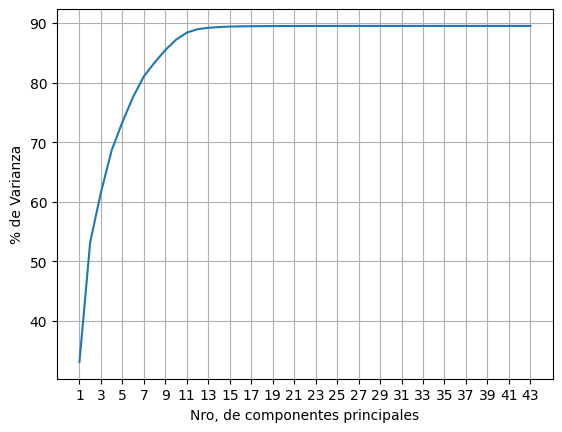

In [19]:
#@title ## **Analizamos el porcentaje de varianza por número de componentes principales**
plt.plot(list(range(1,len(sorted_eigenvalues)+1)), np.cumsum(sorted_eigenvalues)*100)
plt.xticks(list(range(1,len(sorted_eigenvalues)+1,2)))
plt.xlabel("Nro, de componentes principales")
plt.ylabel("% de Varianza")
plt.grid()
plt.show()

In [20]:
#@title ## **Seleccionar los componentes principales** {run: "auto"}
#@markdown ### Número de componentes principales
k = 15 #@param {type:"slider", min:1, max:43, step:1}
selected_eigenvectors = sorted_eigenvectors[:, :k]

In [21]:
#@title ## **Transformamos y guardamos los datos**
#@markdown ### Primero realizamos la transformación (Proyección), luego guardamos estos datos en un nuevo dataframe
X_pca = np.dot(X_normalized, selected_eigenvectors)
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(k)])
df_pca.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,0.651037,-0.559961,0.422361,-1.138009,0.386137,0.432249,-0.315576,0.039921,-0.155874,0.199625,0.482684,-0.379631,-0.028195,0.009619,0.033013
1,0.795535,-0.524835,0.135624,-0.352421,-0.222501,0.043002,-0.116540,0.090870,-0.113216,0.138233,0.455226,-0.382604,-0.149953,-0.006231,0.101001
2,-0.150621,-0.086016,-0.124698,-0.438473,0.010182,0.307754,-0.293728,0.103327,-0.147010,-0.021069,0.414947,-0.390961,-0.119499,0.006194,0.074040
3,-0.174846,-0.078505,-0.135216,-0.473849,-0.000840,0.349994,-0.362735,0.064068,-0.148860,0.080046,0.419995,-0.391173,-0.116687,0.003476,0.072593
4,-0.179209,-0.086769,-0.155847,-0.545652,0.015743,0.344907,-0.327783,0.109371,-0.148899,-0.012667,0.423749,-0.389984,-0.118869,0.006229,0.072512
5,-0.365058,-1.242540,-0.632608,-0.492163,0.391072,-0.179054,-0.513644,-0.122139,0.308218,0.054891,0.338130,-0.986709,-0.107533,-0.036638,0.104834
6,-0.474272,-0.820517,-0.182162,-0.538730,-0.177748,0.840558,0.180131,0.167835,-0.316601,0.322371,0.314154,-0.406488,0.042581,-0.013937,0.047110
7,0.674285,-0.747487,-0.265747,-0.805885,-0.073212,0.467416,-0.106777,0.210433,-0.361238,0.285151,0.373002,-0.379858,-0.081437,-0.016673,0.089174
8,0.732064,-0.609900,0.530777,-0.715852,0.368030,0.265407,-0.206331,0.003613,-0.168573,0.164040,0.453813,-0.361653,-0.147977,0.008330,0.101900
9,0.672402,-0.393571,0.075794,-0.660298,-0.259075,0.191562,-0.351820,0.022310,-0.345141,0.050468,0.364633,-0.380279,-0.146082,-0.007794,0.090608


In [22]:
#@title # **Split entre training y test** {run:"auto"}
test_size = 0.3 #@param {type:"slider", min:0, max:1, step:0.05}
random_state = 42 #@param {type:"slider", min:0, max:100, step:1}
X_train, X_test, y_train, y_test = train_test_split(df_pca, Y, test_size=test_size, random_state=random_state)

# Entrenamiento de modelos (modelo por modelo)
- Regresión logística
- Random Forest Classifier
- MLP

In [23]:
#@title ## **Modelo de regresión logística** {run:"auto"}
#@markdown Primero ajustamos el modelo seleccionando el máximo número de iteraciones y el solver a utilizar
max_iter = 10000 #@param {type:"slider", min:1000, max:100000, step:1000}
solver = 'lbfgs' #@param ["lbfgs", "liblinear"]
lr = LogisticRegression(max_iter=max_iter, solver=solver)

In [24]:
#@title ### **Entrenar el modelo**
history = lr.fit(X_train, y_train)

In [25]:
#@title ### **Puntuaciones de precision y recall**
#@markdown Cross validations(**cv**) -> El número de datos se dividirá en cv partes. Para este caso: En cada iteración, el modelo se entrenará en 2 de las partes y se evaluará en la parte restante, repitiendo esto tres veces, cada vez con un conjunto diferente de datos de prueba.

#@markdown Recall (**recall**) -> Sensibilidad o Tasa de Verdaderos Positivos.

precision_scores = cross_val_score(lr, X_train, y_train, cv=3, scoring='precision')
recall_scores = cross_val_score(lr, X_train, y_train, cv=3, scoring='recall')

print('Precision scores:', precision_scores*100, "%")
print('Recall scores:', recall_scores*100, "%")

Precision scores: [89.40374661 89.54894824 89.46896563] %
Recall scores: [85.23898737 85.3318132  85.3318132 ] %


In [26]:
#@title ### **Puntuaciones medias de precision y recall**
mean_precision = precision_scores.mean()
mean_recall = recall_scores.mean()

stdev_precision = precision_scores.std()
stdev_recall = recall_scores.std()

print(f'Mean Precision: {mean_precision*100:.4f} +/- {stdev_precision*100:.4f} %')
print(f'Mean Recall: {mean_recall*100:.4f} +/- {stdev_recall*100:.4f} %')

Mean Precision: 89.4739 +/- 0.0594 %
Mean Recall: 85.3009 +/- 0.0438 %


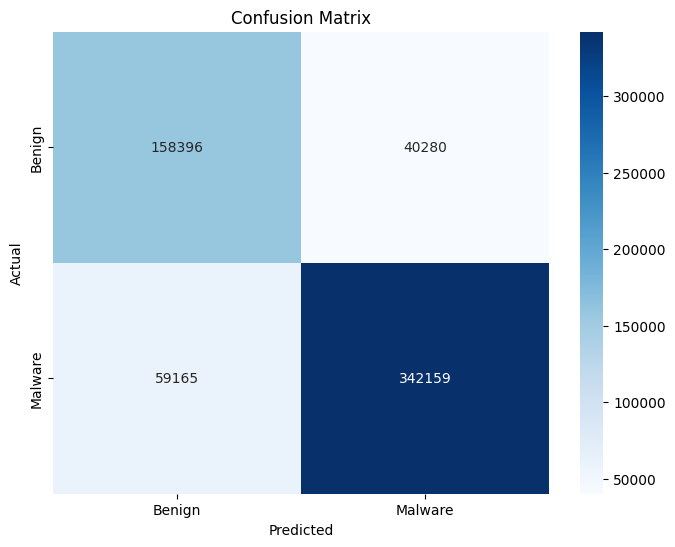

In [27]:
#@title ### **Matriz de confusion**
#@markdown ## Primero obtenemos las predicciones, luego calculamos la matriz de confusión
y_pred = lr.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Definir etiquetas
labels = ['Benign', 'Malware']

# Graficar la matriz de confusión con colores y etiquetas
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
#@title ## **Modelo Random Forest Classifier** {run:"auto"}
#@markdown **n_estimators**: Número de estimadores (árboles en el bosque).

#@markdown **max_depth**: La profundidad máxima de los árboles.

#@markdown **random_state**: Semilla para la generación de números aleatorios.

#@markdown **criterion**: La función para medir la calidad de una división.

n_estimators = 40 #@param {type:"slider", min:10, max:1000, step:10}
criterion='entropy' #@param ["gini","entropy"]
max_depth=5 #@param {type:"slider", min:1, max:50, step:1}
random_state=42 #@param {type:"slider", min:0, max:100, step:1}

rf = RandomForestClassifier(
    n_estimators=n_estimators,
    criterion=criterion,
    max_depth=max_depth,
    random_state=random_state
)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=40,
                       random_state=42)

In [29]:
#@title ### **Puntuaciones de precision y recall**
#@markdown Cross validations(**cv**) -> El número de datos se dividirá en cv partes. Para este caso: En cada iteración, el modelo se entrenará en 2 de las partes y se evaluará en la parte restante, repitiendo esto tres veces, cada vez con un conjunto diferente de datos de prueba.

#@markdown Recall (**recall**) -> Sensibilidad o Tasa de Verdaderos Positivos.

precision_scores_rf = cross_val_score(rf, X_train, y_train, cv=3, scoring='precision')
recall_scores_rf = cross_val_score(rf, X_train, y_train, cv=3, scoring='recall')

print('Precision scores:', precision_scores_rf*100, "%")
print('Recall scores:', recall_scores_rf*100, "%")

Precision scores: [96.59131858 96.61395083 96.63243419] %
Recall scores: [95.28654465 95.41623166 95.22311964] %


In [30]:
#@title ### **Puntuaciones medias de precision y recall**
mean_precision_rf = precision_scores_rf.mean()
mean_recall_rf = recall_scores_rf.mean()

stdev_precision_rf = precision_scores_rf.std()
stdev_recall_rf = recall_scores_rf.std()

print(f'Mean Precision: {mean_precision_rf*100:.4f} +/- {stdev_precision_rf*100:.4f} %')
print(f'Mean Recall: {mean_recall_rf*100:.4f} +/- {stdev_recall_rf*100:.4f} %')

Mean Precision: 96.6126 +/- 0.0168 %
Mean Recall: 95.3086 +/- 0.0804 %


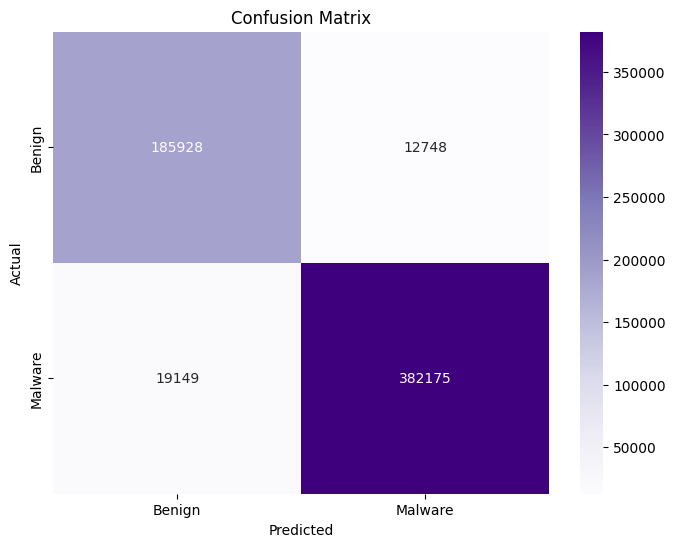

In [31]:
#@title ### **Matriz de confusion**
#@markdown ## Primero obtenemos las predicciones, luego calculamos la matriz de confusión
y_pred_rf = rf.predict(X_test)

# Calcular la matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Definir etiquetas
labels = ['Benign', 'Malware']

# Graficar la matriz de confusión con colores y etiquetas
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
#@title ## **Modelo Artificial Neural Network** {run:"auto"}
#@markdown Creamos una arquitectura con una capa de entrada de k neuronas, donde k es el número de componentes principales que seleccionamos tras el PCA,
#@markdown luego una capa oculta con 64 neuronas seguida de otra capa oculta de 32 neuronas, cada una con su propia función de activación.
#@markdown Finalmente, la capa de salida con una única neurona, pues es un modelo de clasificación binaria cuya función de activación será la sigmoide.

activation_fn_1 = 'relu' #@param ["relu", "tanh"]
activation_fn_2 = 'tanh' #@param ["relu", "tanh"]

model = Sequential([
    Dense(8, activation=activation_fn_1, input_shape=(k,)),  # Primera capa oculta con 64 neuronas
    Dropout(0.1),  # Dropout para regularizar
    Dense(16, activation=activation_fn_2),  # Segunda capa oculta con 32 neuronas
    Dropout(0.2),  # Dropout para regularizar
    Dense(1, activation='sigmoid')  # Capa de salida con activación sigmoide para clasificación binaria
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
#@title ### **Compilamos el modelo**
#@markdown Seleccionaremos el tipo de optimizador y la función de pérdida. La métrica será la precisión
optimizer = 'adam' #@param ["adam", "sgd"]
loss = 'binary_crossentropy' #@param ["binary_crossentropy", "mean_squared_error"]
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
#@title ### **Entrenamos el modelo** {run:"auto"}
#@markdown Seleccionamos el número de épocas de entrenamiento y el tamaño de los batchs
epochs = 10 #@param {type:"slider", min:5, max:100, step:5}
batch_size = 64 #@param {type:"slider", min:32, max:1024, step:32}
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/10
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - accuracy: 0.9050 - loss: 0.2232
Epoch 2/10
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - accuracy: 0.9547 - loss: 0.1291
Epoch 3/10
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - accuracy: 0.9598 - loss: 0.1158
Epoch 4/10
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - accuracy: 0.9615 - loss: 0.1105
Epoch 5/10
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - accuracy: 0.9625 - loss: 0.1074
Epoch 6/10
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - accuracy: 0.9632 - loss: 0.1050
Epoch 7/10
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - accuracy: 0.9639 - loss: 0.1033
Epoch 8/10
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - accuracy: 0.9646 - loss: 0.1008
Epoch 9/10
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 83s 2ms/step - accuracy: 0.9645 - loss: 0.1011
Epoch 10/10
21875/21875 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - accuracy: 0.9654 - loss: 0.0990


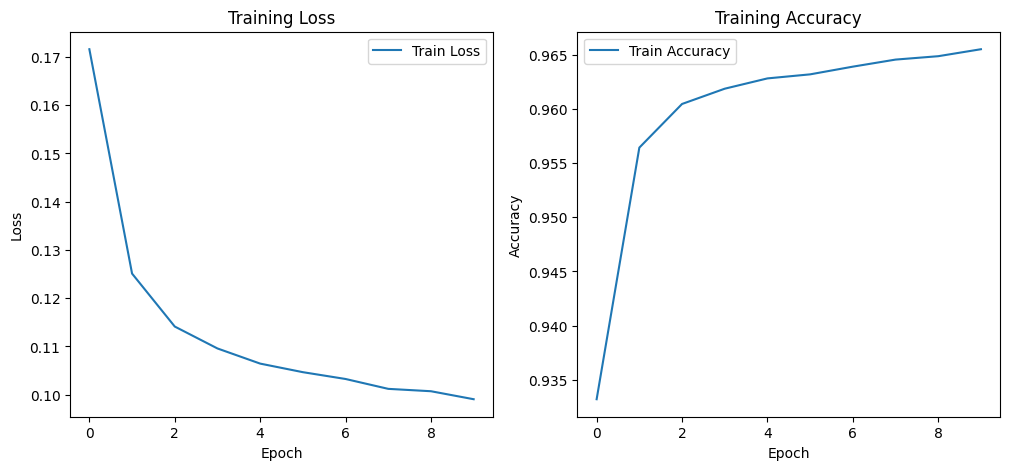

In [35]:
#@title ## **Graficar la pérdida de entrenamiento y validación**
plt.figure(figsize=(12, 5))

# Pérdida de entrenamiento y validación
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Precisión de entrenamiento y validación
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.show()

In [36]:
#@title ### **Evaluamos el modelo con los datos de prueba**
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test de pérdida: {test_loss:.4f}")
print(f"Test de precisión: {test_accuracy:.4f}")

18750/18750 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.9766 - loss: 0.0716
Test de pérdida: 0.0715
Test de precisión: 0.9765


18750/18750 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step


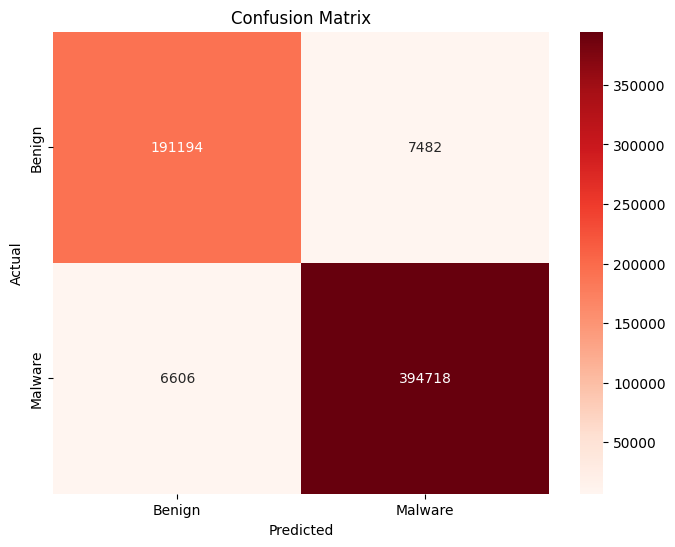

In [37]:
#@title ### **Matriz de confusion**
#@markdown ## Primero obtenemos las predicciones, y convertimos los resultados en etiquetas binarias. Luego calculamos la matriz de confusión
y_pred_ann = model.predict(X_test)

# Convertir las predicciones en etiquetas binarias
y_pred_ann_labels = (y_pred_ann >= 0.5).astype(int)

# Calcular la matriz de confusión
cm_ann = confusion_matrix(y_test, y_pred_ann_labels)

# Definir etiquetas
labels = ['Benign', 'Malware']

# Graficar la matriz de confusión con colores y etiquetas
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Entrenamiento de modelos (varios) con hiperparametros cambiados

In [38]:
#@title ## **Modelos de regresión logística**
max_iters = [5000,10000,15000]
solvers = ["lbfgs", "liblinear"]
lrs = [LogisticRegression(max_iter=max_iter, solver=solver) for max_iter in max_iters for solver in solvers]

In [39]:
#@title ## Entrenamiento de los modelos
history_lrs = [lr.fit(X_train, y_train) for lr in lrs]

In [40]:
#@title ### **Puntuaciones de precision y recall**
precision_scores_lrs = [cross_val_score(lr, X_train, y_train, cv=3, scoring='precision') for lr in lrs]
recall_scores_lrs = [cross_val_score(lr, X_train, y_train, cv=3, scoring='recall') for lr in lrs]

In [41]:
for i, (precision_scores, recall_scores) in enumerate(zip(precision_scores_lrs, recall_scores_lrs)):
  print(f"Puntaje de precision del modelo {i+1}: {precision_scores.mean()*100:.4f} +/- {precision_scores.std()*100:.4f} %")
  print(f"Puntaje de recall del modelo {i+1}: {recall_scores.mean()*100:.4f} +/- {recall_scores.std()*100:.4f} %")

Puntaje de precision del modelo 1: 89.4739 +/- 0.0594 %
Puntaje de recall del modelo 1: 85.3009 +/- 0.0438 %
Puntaje de precision del modelo 2: 89.5631 +/- 0.0619 %
Puntaje de recall del modelo 2: 85.2928 +/- 0.0437 %
Puntaje de precision del modelo 3: 89.4739 +/- 0.0594 %
Puntaje de recall del modelo 3: 85.3009 +/- 0.0438 %
Puntaje de precision del modelo 4: 89.5631 +/- 0.0619 %
Puntaje de recall del modelo 4: 85.2928 +/- 0.0437 %
Puntaje de precision del modelo 5: 89.4739 +/- 0.0594 %
Puntaje de recall del modelo 5: 85.3009 +/- 0.0438 %
Puntaje de precision del modelo 6: 89.5631 +/- 0.0619 %
Puntaje de recall del modelo 6: 85.2928 +/- 0.0437 %


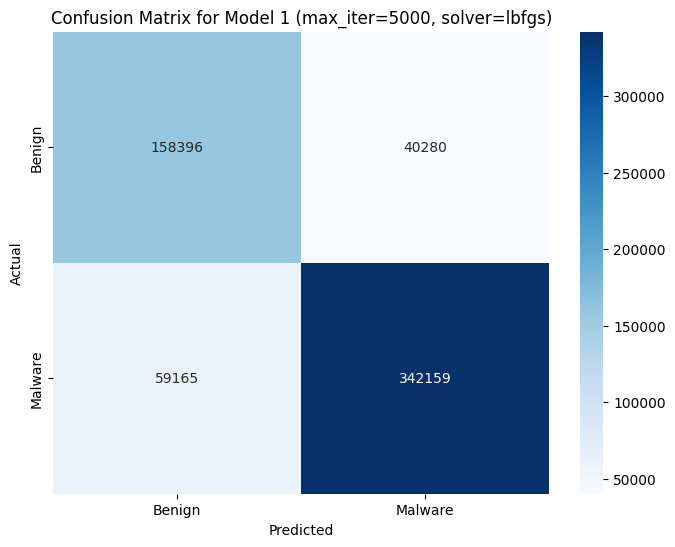

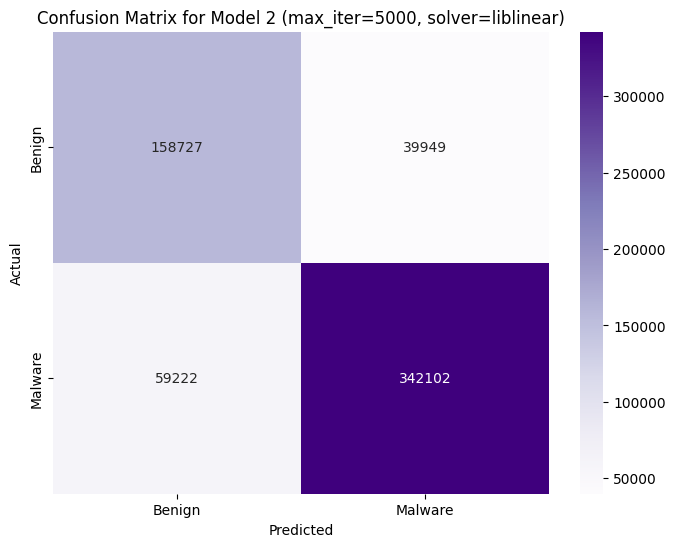

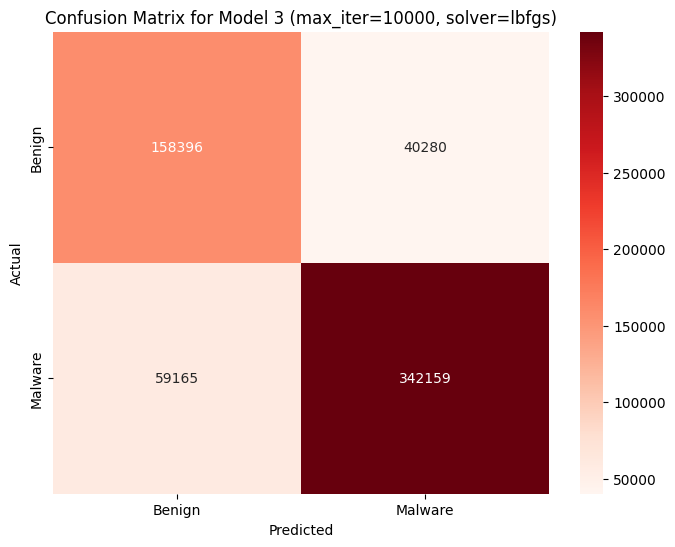

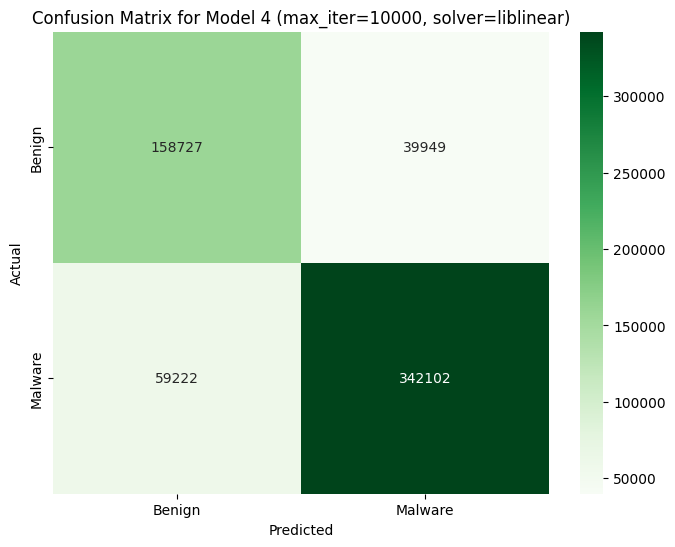

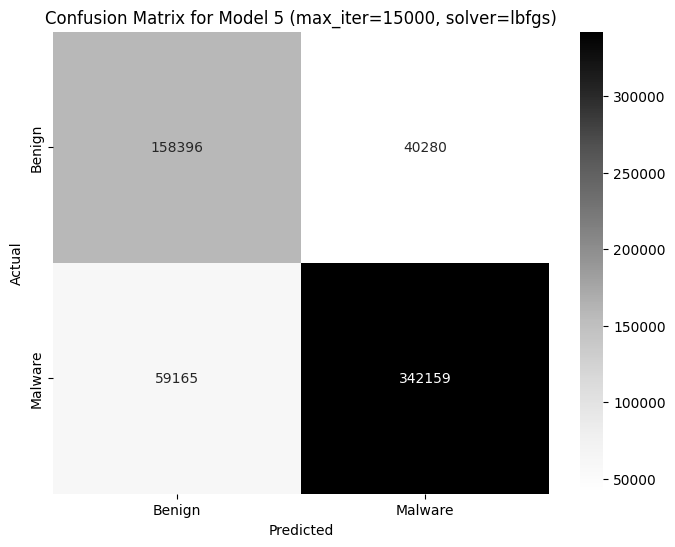

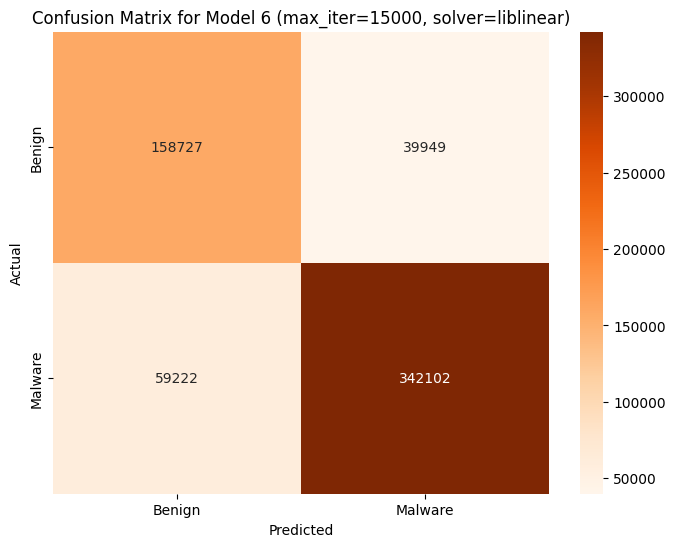

In [42]:
#@title ### Matrices de confusión
colors = ['Blues', 'Purples', 'Reds', 'Greens', 'Greys', 'Oranges']

for i, lr in enumerate(lrs):
    # Realizar predicciones
    y_pred = lr.predict(X_test)

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Definir etiquetas
    labels = ['Benign', 'Malware']

    # Graficar la matriz de confusión con el color correspondiente
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=colors[i % len(colors)], xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for Model {i+1} (max_iter={lr.max_iter}, solver={lr.solver})')
    plt.show()

In [43]:
#@title ## **Modelos Random Forest Classifier**
n_estimators_s = [10,20]
criterion_s=["gini","entropy"]
max_depth_s=5
random_state=42

rfs = [RandomForestClassifier(n_estimators=n, criterion=c, max_depth=max_depth, random_state=random_state) for n in n_estimators_s for c in criterion_s]

In [44]:
#@title ## Entrenamiento de los modelos
for rf in rfs:
  rf.fit(X_train, y_train)

In [ ]:
#@title ### **Puntuaciones de precision y recall**
precision_scores_rfs = [cross_val_score(rf, X_train, y_train, cv=3, scoring='precision') for rf in rfs]
recall_scores_rfs = [cross_val_score(rf, X_train, y_train, cv=3, scoring='recall') for rf in rfs]

In [ ]:
for i, (precision_scores, recall_scores) in enumerate(zip(precision_scores_rfs, recall_scores_rfs)):
  print(f"Puntaje de precision del modelo {i+1}: {precision_scores.mean()*100:.4f} +/- {precision_scores.std()*100:.4f} %")
  print(f"Puntaje de recall del modelo {i+1}: {recall_scores.mean()*100:.4f} +/- {recall_scores.std()*100:.4f} %")

In [ ]:
#@title ### Matrices de confusión
colors = ['Blues', 'Purples', 'Reds', 'Greens', 'Greys', 'Oranges']

for i, rf in enumerate(rfs):
    # Realizar predicciones
    y_pred = rf.predict(X_test)

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Definir etiquetas
    labels = ['Benign', 'Malware']

    # Graficar la matriz de confusión con el color correspondiente
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=colors[i % len(colors)], xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for Model {i+1} (n_estimators={rf.n_estimators}, criterion={rf.criterion})')
    plt.show()